# Аналіз та порівняння методів обчислення показника Херста

Цей документ демонструє різні підходи до обчислення показника Херста для часових рядів за допомогою Python-модуля `hurst`.

## Зміст
1. [Вступ](#вступ)
2. [Імпорт необхідних бібліотек](#імпорт-необхідних-бібліотек)
3. [Генерація тестових даних](#генерація-тестових-даних)
4. [Функція для обчислення та візуалізації показника Херста](#функція-для-обчислення-та-візуалізації-показника-херста)
5. [Порівняння різних режимів обчислення](#порівняння-різних-режимів-обчислення)
6. [Порівняння різних методів генерації даних](#порівняння-різних-методів-генерації-даних)
7. [Генерація різних типів випадкових блукань](#генерація-різних-типів-випадкових-блукань)
8. [Висновки](#висновки)

## Вступ

Показник Херста (H) – це статистична міра, яка допомагає визначити характер часового ряду:
- H = 0.5 — Броунівський рух (випадкове блукання)
- 0.5 < H < 1.0 — персистентна поведінка (тренд зберігається)
- 0 < H < 0.5 — антиперсистентна поведінка (тренд змінюється)

Цей скрипт демонструє різні способи обчислення показника Херста та порівнює їх результати.

## Імпорт необхідних бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

У цьому блоці коду ми імпортуємо:
- `numpy` — для математичних операцій та роботи з масивами
- `matplotlib.pyplot` — для візуалізації результатів
- `compute_Hc` та `random_walk` — функції з модуля `hurst` для обчислення показника Херста та генерації випадкових блукань

## Генерація тестових даних

In [2]:
# Встановлюємо seed для відтворюваності результатів
np.random.seed(42)
# Генеруємо випадкові зміни з нормальним розподілом (невеликі відхилення)
random_changes = 1. + np.random.randn(99999) / 1000.
# Створюємо часовий ряд як кумулятивний добуток змін (імітація цінового ряду)
series = np.cumprod(random_changes)

У цьому блоці ми:
1. Встановлюємо фіксоване значення seed для генератора випадкових чисел, щоб результати були відтворюваними
2. Генеруємо 99999 випадкових змін з нормальним розподілом, масштабованих до невеликих значень (порядку 0.001)
3. Обчислюємо кумулятивний добуток цих змін, що імітує поведінку цінового ряду (наприклад, ціни на акції)

## Функція для обчислення та візуалізації показника Херста

In [3]:
def evaluate_hurst(series, kind, simplified=True):
    """
    Обчислює показник Херста для часового ряду та візуалізує результати R/S-аналізу
    
    Параметри:
    series — часовий ряд для аналізу
    kind — тип ряду ('price', 'change', 'random_walk')
    simplified — використовувати спрощений алгоритм обчислення
    """
    # Обчислюємо показник Херста, коефіцієнт c та дані для побудови графіка
    H, c, data = compute_Hc(series=series, kind=kind, simplified=simplified)
    
    # Створюємо графік
    f, ax = plt.subplots()
    # Додаємо лінію регресії
    ax.plot(data[0], c*data[0]**H, color="deepskyblue")
    # Додаємо точки спостережень
    ax.scatter(data[0], data[1], color="purple")
    # Встановлюємо логарифмічний масштаб для обох осей
    ax.set_xscale('log')
    ax.set_yscale('log')
    # Додаємо підписи осей
    ax.set_xlabel('Часовий інтервал')
    ax.set_ylabel('Відношення R/S')
    # Додаємо сітку для кращої читабельності
    ax.grid(True)
    # Відображаємо графік
    plt.show()
    # Виводимо результати обчислення
    print("H={:.4f}, c={:.4f}".format(H,c))

Ця функція:
1. Приймає часовий ряд, тип ряду та параметр спрощення алгоритму
2. Обчислює показник Херста та суміжні параметри за допомогою функції `compute_Hc`
3. Візуалізує результати у вигляді логарифмічного графіка R/S-аналізу
4. Виводить значення показника Херста (H) та коефіцієнта c

## Порівняння різних режимів обчислення

У цьому блоці ми аналізуємо один і той самий ряд даних, але з різними параметрами `kind`:
- `"price"` — інтерпретує дані як ціновий ряд (умовні ціни активу)
- `"change"` — інтерпретує дані як ряд змін (відносні зміни від періоду до періоду)
- `"random_walk"` — інтерпретує дані як випадкове блукання (кумулятивна сума змін)

Це порівняння показує, як різні інтерпретації вхідних даних впливають на результат обчислення показника Херста.

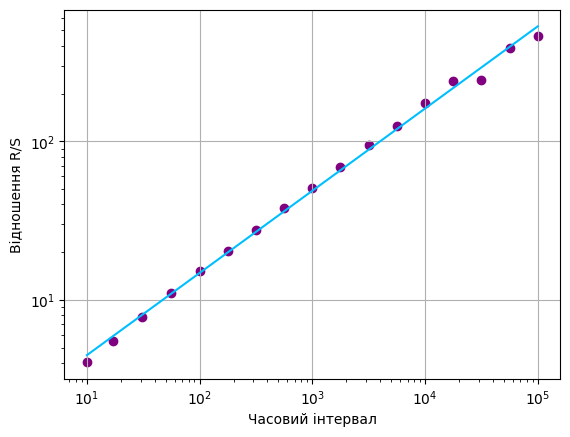

H=0.5183, c=1.3587


In [4]:
# Аналіз як цінового ряду (кумулятивний добуток змін)
evaluate_hurst(series=series, kind="price", simplified=True)

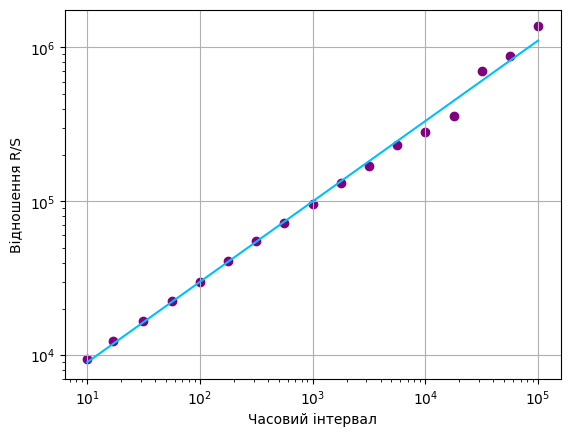

H=0.5228, c=2695.8487


In [5]:
# Аналіз як ряду змін
evaluate_hurst(series=series, kind="change", simplified=True)

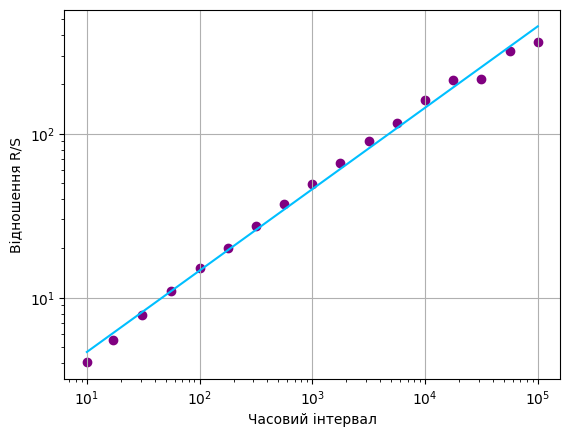

H=0.4968, c=1.4852


In [6]:
# Аналіз як випадкового блукання (кумулятивна сума змін)
evaluate_hurst(series=series, kind="random_walk", simplified=True)

### Інтерпретація результатів різних режимів обчислення

Для одного й того самого ряду даних ми отримали різні значення показника Херста:
- Для аналізу як цінового ряду: H=0.5183 (близький до броунівського руху з легкою персистентністю)
- Для аналізу як ряду змін: H=0.5228 (також близький до броунівського руху)
- Для аналізу як випадкового блукання: H=0.4968 (практично ідеальний броунівський рух)

Цікаво відзначити значну різницю в коефіцієнті c між різними режимами, особливо для ряду змін (c=2695.8487), що вказує на різний масштаб R/S-відношення.

## Порівняння різних методів генерації даних

In [7]:
# Генеруємо новий часовий ряд за допомогою функції random_walk
series_2 = random_walk(99999, cumprod=True)

## Аналізуємо новий ряд з різними параметрами `kind`

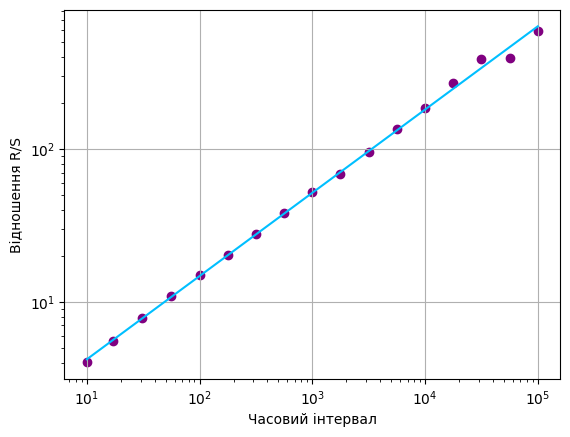

H=0.5448, c=1.1984


In [8]:
evaluate_hurst(series=series_2, kind="price", simplified=True)

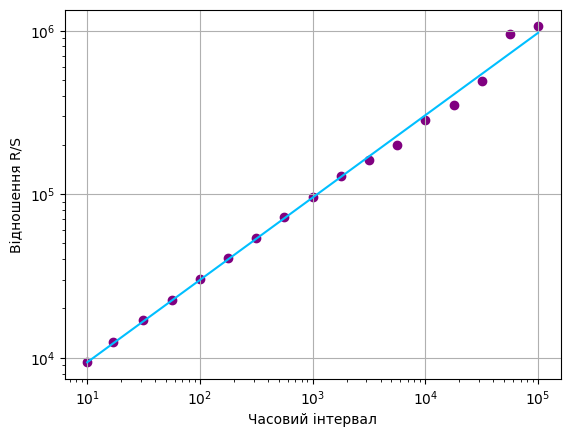

H=0.5038, c=2935.3111


In [9]:
evaluate_hurst(series=series_2, kind="change", simplified=True)

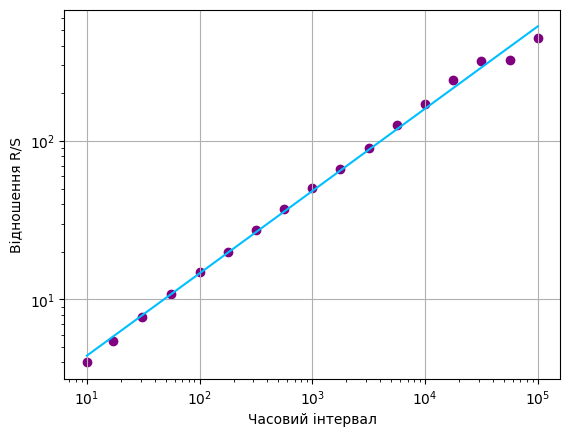

H=0.5199, c=1.3324


In [10]:
evaluate_hurst(series=series_2, kind="random_walk", simplified=True)

У цьому блоці ми:
1. Генеруємо новий часовий ряд за допомогою функції `random_walk` з пакету `hurst`
2. Параметр `cumprod=True` вказує, що ми хочемо отримати ряд як кумулятивний добуток змін
3. Аналізуємо цей новий ряд з тими ж параметрами `kind`, що й для першого ряду

Це дозволяє порівняти результати для двох різних методів генерації даних: власноруч (з використанням `np.cumprod` та `np.random.randn`) та за допомогою вбудованої функції `random_walk`.


### Аналіз результатів різних методів генерації

Порівнюючи результати двох методів генерації випадкових рядів, ми бачимо:

1. Для першого методу (власноруч через np.cumprod):
   - При аналізі як цінового ряду: H=0.5183
   - При аналізі як випадкового блукання: H=0.4968

2. Для другого методу (функція random_walk з cumprod=True):
   - При аналізі як цінового ряду: H=0.5448
   - При аналізі як випадкового блукання: H=0.5199

Це демонструє, що вбудована функція random_walk з параметром cumprod=True створює ряд з трохи вищою персистентністю порівняно з методом, який використовує np.cumprod.

## Генерація різних типів випадкових блукань

In [11]:
def plotting(dataseries, title='Часовий ряд'):
    """
    Функція для візуалізації часового ряду
    
    Параметри:
    dataseries — часовий ряд для візуалізації
    title — назва графіка, за замовчуванням 'Часовий ряд'
    """
    # Візуалізуємо перші 10000 точок для кращого відображення
    plt.figure(figsize=(6, 4))
    plt.plot(dataseries[:10000], color='#1f77b4')  # Використовуємо синій колір як на зображенні
    plt.title(title)
    plt.xlabel('Час')
    plt.ylabel('Значення')
    plt.tight_layout()
    plt.show()

In [12]:
# Генерація броунівського руху (H ≈ 0.5)
brownian = random_walk(99999, proba=0.5)

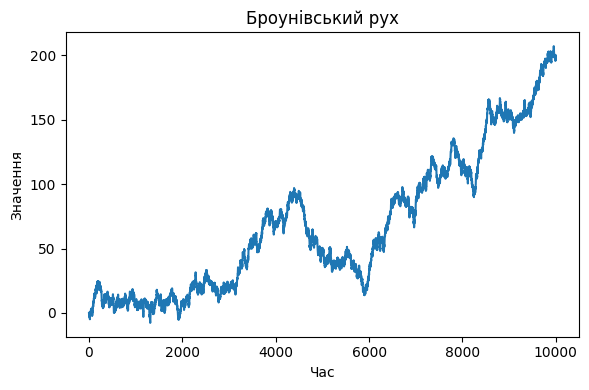

In [13]:
plotting(dataseries=brownian, title='Броунівський рух')

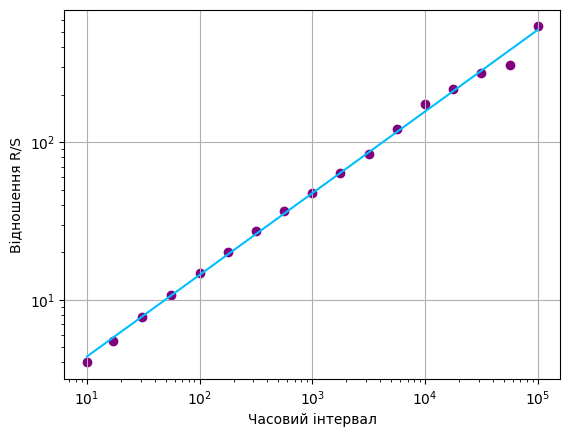

H=0.5187, c=1.3189


In [14]:
evaluate_hurst(series=brownian, kind="random_walk", simplified=True)

In [15]:
# Генерація персистентного випадкового блукання (0.5 < H < 1.0)
persistent = random_walk(99999, proba=0.7)

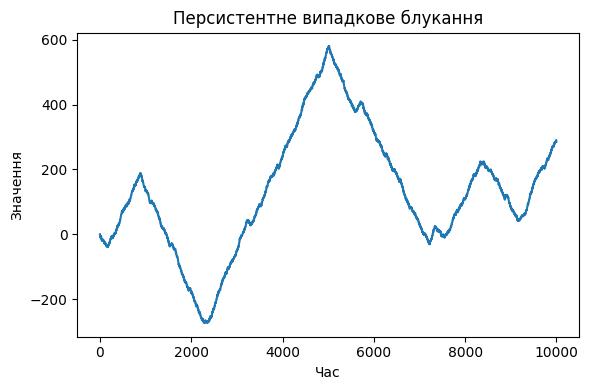

In [16]:
plotting(dataseries=persistent, title='Персистентне випадкове блукання')

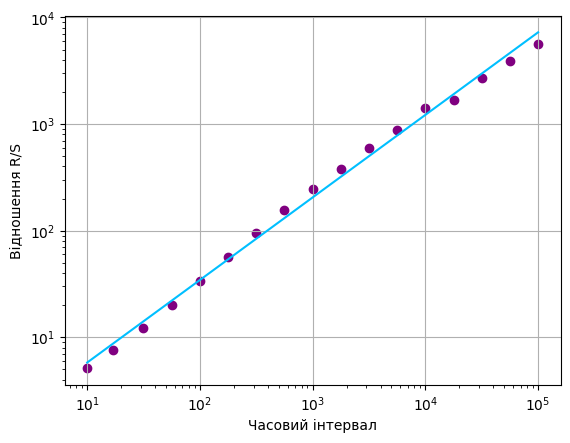

H=0.7745, c=0.9737


In [17]:
evaluate_hurst(series=persistent, kind="random_walk", simplified=True)

In [18]:
# Генерація антиперсистентного випадкового блукання (0 < H < 0.5)
antipersistent = random_walk(99999, proba=0.3)

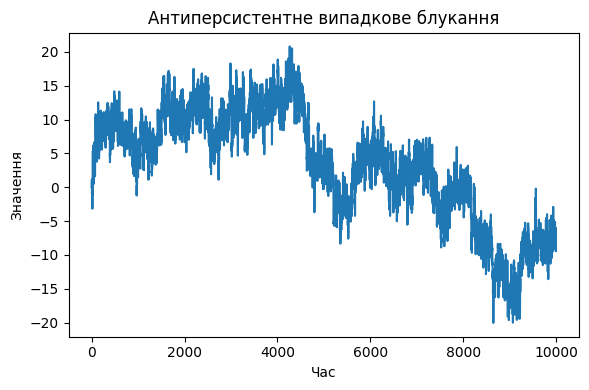

In [19]:
plotting(dataseries=antipersistent, title='Антиперсистентне випадкове блукання')

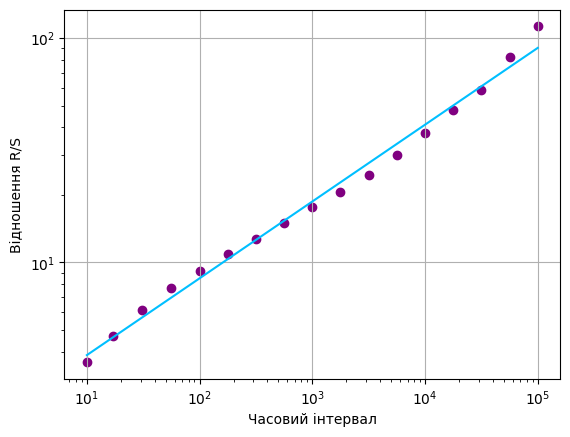

H=0.3424, c=1.7551


In [20]:
evaluate_hurst(series=antipersistent, kind="random_walk", simplified=True)

У цьому блоці ми демонструємо, як можна генерувати різні типи випадкових блукань за допомогою функції `random_walk`:

1. **Броунівський рух** (H ≈ 0.5):
    - Використовуємо параметр `proba=0.5`, що означає рівну ймовірність руху вгору чи вниз
    - Такий ряд не має "пам'яті" про попередні значення
    - Наприклад, це може імітувати ефективний ринок, де ціни змінюються випадково

2. **Персистентне випадкове блукання** (0.5 < H < 1.0):
    - Використовуємо параметр `proba=0.7`, що підвищує ймовірність продовження поточного тренду
    - Такий ряд має "довгу пам'ять" і тенденцію зберігати тренд
    - Відображає процеси з позитивним зворотним зв'язком, наприклад, ціни на ринках з високим трендом

3. **Антиперсистентне випадкове блукання** (0 < H < 0.5):
    - Використовуємо параметр `proba=0.3`, що підвищує ймовірність реверсії тренду
    - Такий ряд має тенденцію повертатися до середнього значення
    - Імітує процеси з негативним зворотним зв'язком, наприклад, коливання запасів або коригування цін

Аналіз цих трьох типів рядів дозволяє наочно побачити, як відрізняються їхні характеристики та показники Херста.

Як бачимо з результатів обчислення показника Херста, ми отримали:
- Для броунівського руху: H=0.5187 (дуже близько до теоретичного значення 0.5)
- Для персистентного блукання: H=0.7745 (значно вище 0.5, що відповідає персистентності)
- Для антиперсистентного блукання: H=0.3424 (значно нижче 0.5, що вказує на антиперсистентність)

Ці результати підтверджують, що параметр `proba` функції `random_walk` дійсно дозволяє генерувати часові ряди з різними характеристиками персистентності.

## Висновки

Цей скрипт демонструє:
1. Різні підходи до обчислення показника Херста залежно від інтерпретації вхідних даних
2. Вплив методу генерації даних на результати аналізу
3. Візуалізацію R/S-аналізу для оцінки якості лінійної регресії
4. Генерацію та аналіз трьох різних типів випадкових блукань з різними характеристиками персистентності

Залежно від контексту аналізу та природи даних, різні параметри можуть давати більш точні або інтерпретовані результати. Порівняння цих підходів допомагає обрати найбільш відповідний метод для конкретного випадку.

Правильний вибір типу аналізу та інтерпретація показника Херста є важливими для фінансового аналізу, прогнозування часових рядів та вивчення стохастичних процесів у різних галузях науки та економіки.

### Практичні рекомендації на основі аналізу

1. При аналізі фінансових рядів рекомендується використовувати параметр `kind="price"` для цінових рядів (наприклад, курси акцій чи валют).
   
2. Для аналізу часових рядів з фізичних вимірювань (наприклад, температура, рівень опадів) краще використовувати `kind="random_walk"`.

3. Якщо показник Херста близький до 0.5, ряд поводиться як випадковий процес, і для прогнозування краще використовувати прості статистичні методи.

4. Якщо H > 0.5, ряд має тренди та довгу пам'ять, тому для прогнозування ефективніші методи, що враховують довгострокові залежності (наприклад, ARFIMA-моделі).

5. Якщо H < 0.5, ряд має тенденцію до реверсії до середнього, і для аналізу підходять методи, що враховують цю властивість (наприклад, моделі середнього-реверсії).

## Джерела та додаткова література

1. Hurst, H.E. (1951). "Long-term storage capacity of reservoirs". Transactions of the American Society of Civil Engineers, 116, 770-799.
   
2. Peters, E.E. (1994). "Fractal Market Analysis: Applying Chaos Theory to Investment and Economics". John Wiley & Sons.
   
3. Документація бібліотеки hurst: [GitHub: Mottl/hurst](https://github.com/Mottl/hurst)